# Ghostbusters
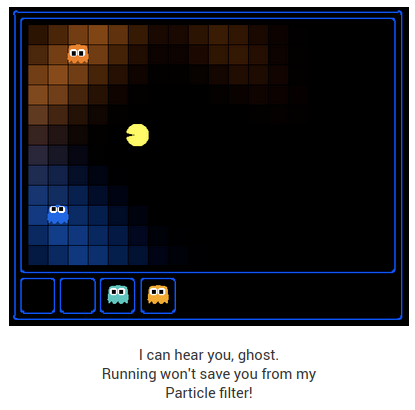

# <font color=blue>*Introduction*

Pacman spends his life running from ghosts, but things were not always so. Legend has it that many years ago, Pacman's great grandfather Grandpac learned to hunt ghosts for sport. However, he was blinded by his power and could only track ghosts by their banging and clanging.

In this project, you will design Pacman agents that use sensors to locate and eat invisible ghosts. You'll advance from locating single, stationary ghosts to hunting packs of multiple moving ghosts with ruthless efficiency.

The code for this project contains the following files, available as a <a href="https://inst.eecs.berkeley.edu/~cs188/fa18/assets/files/ghostbusters.zip">zip archive<a>. 

**Note**: In this project you only need to submit the token generated by `submission_autograder.py`. See Submission for details.
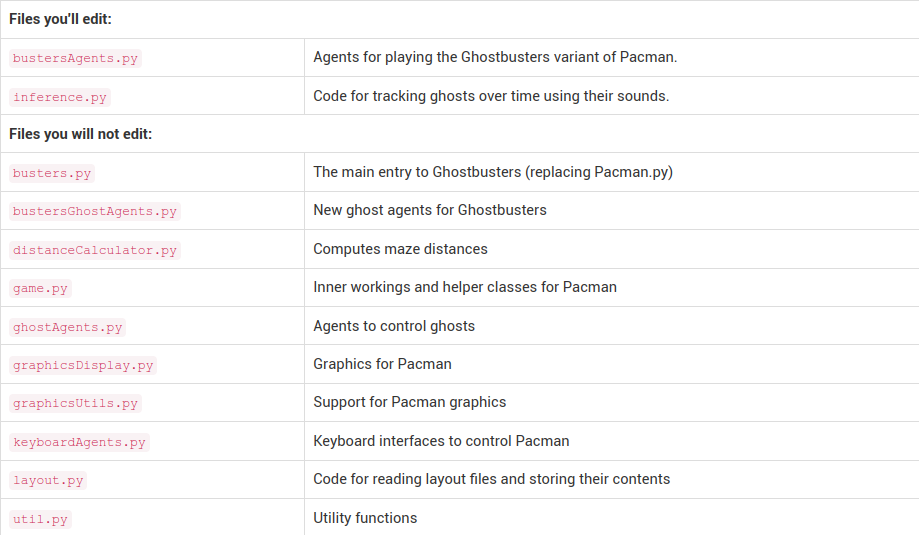    


# <font color=blue>*Ghostbusters and BNs*

In the CS 188 version of Ghostbusters, the goal is to hunt down scared but invisible ghosts. Pacman, ever resourceful, is equipped with sonar (ears) that provides noisy readings of the Manhattan distance to each ghost. The game ends when Pacman has eaten all the ghosts. To start, try playing a game yourself using the keyboard.


The blocks of color indicate where the each ghost could possibly be, given the noisy distance readings provided to Pacman. The noisy distances at the bottom of the display are always non-negative, and always within 7 of the true distance. The probability of a distance reading decreases exponentially with its difference from the true distance.

Your primary task in this project is to implement inference to track the ghosts. For the keyboard based game above, a crude form of inference was implemented for you by default: all squares in which a ghost could possibly be are shaded by the color of the ghost. Naturally, we want a better estimate of the ghost's position. Fortunately, Bayes' Nets provide us with powerful tools for making the most of the information we have. Throughout the rest of this project, you will implement algorithms for performing both exact and approximate inference using Bayes' Nets. The project is challenging, so we do encouarge you to start early and seek help when necessary.

While watching and debugging your code with the autograder, it will be helpful to have some understanding of what the autograder is doing. There are 2 types of tests in this project, as differentiated by their `*.test` files found in the subdirectories of the `test_cases` folder. For tests of class `DoubleInferenceAgentTest`, you will see visualizations of the inference distributions generated by your code, but all Pacman actions will be preselected according to the actions of the staff implementation. This is necessary in order to allow comparision of your distributions with the staff's distributions. The second type of test is `GameScoreTest`, in which your `BustersAgent` will actually select actions for Pacman and you will watch your Pacman play and win games.

As you implement and debug your code, you may find it useful to run a single test at a time. In order to do this you will need to use the `-t` flag with the autograder. For example if you only want to run the first test of question 1, use:


In general, all test cases can be found inside `test_cases/q*`.

For this project, it is possible sometimes for the autograder to time out if running the tests with graphics. To accurately determine whether or not your code is efficient enough, you should run the tests with the `--no-graphics` flag. If the autograder passes with this flag, then you will receive full points, even if the autograder times out with graphics.

# <font color=blue>*`DiscreteDistribution` Class*

Throughout this project, we will be using the `DiscreteDistribution` class defined in `inference.py` to model belief distributions and weight distributions. This class is an extension of the built-in Python dictionary class, where the keys are the different discrete elements of our distribution, and the corresponding values are proportional to the belief or weight that the distribution assigns that element. This question asks you to fill in the missing parts of this class, which will be crucial for later questions (even though this question itself is worth no points).

First, fill in the `normalize` method, which normalizes the values in the distribution to sum to one, but keeps the proportions of the values the same. Use the `total` method to find the sum of the values in the distribution. For an empty distribution or a distribution where all of the values are zero, do nothing. Note that this method modifies the distribution directly, rather than returning a new distribution.

Second, fill in the `sample` method, which draws a sample from the distribution, where the probability that a key is sampled is proportional to its corresponding value. Assume that the distribution is not empty, and not all of the values are zero. Note that the distribution does not necessarily have to be normalized prior to calling this method. You may find Python's built-in `random.random()` function useful for this question.

There are no autograder tests for this question, but the correctness of your implementation can be easily checked. We have provided Python doctests as a starting point, and you can feel free to add more and implement other tests of your own. You can run the doctests using:


Note that, depending on the implementation details of the `sample` method, some correct implementations may not pass the doctests that are provided. To thoroughly check the correctness of your `sample` method, you should instead draw many samples and see if the frequency of each key converges to be proportional of its corresponding value.


# <font color=blue>*Observation Probability*

In this question, you will implement the `getObservationProb` method in the `InferenceModule` base class in `inference.py`. This method takes in an observation (which is a noisy reading of the distance to the ghost), Pacman's position, the ghost's position, and the position of the ghost's jail, and returns the probability of the noisy distance reading given Pacman's position and the ghost's position. In other words, we want to return `P(noisyDistance | pacmanPosition, ghostPosition)`.

The distance sensor has a probability distribution over distance readings given the true distance from Pacman to the ghost. This distribution is modeled by the function `busters.getObservationProbability(noisyDistance, trueDistance)`, which returns `P(noisyDistance | trueDistance)` and is provided for you. You should use this function to help you solve the problem, and use the provided `manhattanDistance` function to find the distance between Pacman's location and the ghost's location.

However, there is the special case of jail that we have to handle as well. Specifically, when we capture a ghost and send it to the jail location, our distance sensor deterministically returns `None`, and nothing else. So, if the ghost's position is the jail position, then the observation is `None` with probability 1, and everything else with probability 0. Conversely, if the distance reading is not `None`, then the ghost is in jail with probability 0. If the distance reading is None, then the ghost is in jail with probability 1. Make sure you handle this special case in your implementation.

To test your code and run the autograder for this question:


As a general note, it is possible for some of the autograder tests to take a long time to run for this project, and you will have to exercise patience. As long as the autograder doesn't time out, you should be fine (provided that you actually pass the tests).

# <font color=blue>*Exact Inference Observation*

In this question, you will implement the `observeUpdate` method in `ExactInference` class of `inference.py` to correctly update the agent's belief distribution over ghost positions given an observation from Pacman's sensors. You are implementing the online belief update for observing new evidence. The observe method should, for this problem, update the belief at every position on the map after receiving a sensor reading. You should iterate your updates over the variable `self.allPositions` which includes all legal positions plus the special jail position. Beliefs represent the probability that the ghost is at a particular location, and are stored as a `DiscreteDistribution` object in a field called `self.beliefs`, which you should update.

Before typing any code, write down the equation of the inference problem you are trying to solve. You should use the function `self.getObservationProb` that you wrote in the last question, which returns the probability of an observation given Pacman's position, a potential ghost position, and the jail position. You can obtain Pacman's position using `gameState.getPacmanPosition()`, and the jail position using `self.getJailPosition()`.

In the Pacman display, high posterior beliefs are represented by bright colors, while low beliefs are represented by dim colors. You should start with a large cloud of belief that shrinks over time as more evidence accumulates. As you watch the test cases, be sure that you understand how the squares converge to their final coloring.

**Note**: your busters agents have a separate inference module for each ghost they are tracking. That's why if you print an observation inside the `update` function, you'll only see a single number even though there may be multiple ghosts on the board.

To run the autograder for this question and visualize the output:


If you want to run this test (or any of the other tests) without graphics you can add the following flag:


**IMPORTANT**: In general, it is possible sometimes for the autograder to time out if running the tests with graphics. To accurately determine whether or not your code is efficient enough, you should run the tests with the `--no-graphics` flag. If the autograder passes with this flag, then you will receive full points, even if the autograder times out with graphics.

# <font color=blue>*Exact Inference With Time Elapse*

In the previous question you implemented belief updates for Pacman based on his observations. Fortunately, Pacman's observations are not his only source of knowledge about where a ghost may be. Pacman also has knowledge about the ways that a ghost may move; namely that the ghost can not move through a wall or more than one space in one time step.

To understand why this is useful to Pacman, consider the following scenario in which there is Pacman and one Ghost. Pacman receives many observations which indicate the ghost is very near, but then one which indicates the ghost is very far. The reading indicating the ghost is very far is likely to be the result of a buggy sensor. Pacman's prior knowledge of how the ghost may move will decrease the impact of this reading since Pacman knows the ghost could not move so far in only one move.

In this question, you will implement the `elapseTime` method in `ExactInference`. The `elapseTime` step should, for this problem, update the belief at every position on the map after one time step elapsing. Your agent has access to the action distribution for the ghost through `self.getPositionDistribution`. In order to obtain the distribution over new positions for the ghost, given its previous position, use this line of code:


Where `oldPos` refers to the previous ghost position. `newPosDist` is a `DiscreteDistribution` object, where for each position `p` in `self.allPositions`, `newPosDist[p]` is the probability that the ghost is at position `p` at time `t + 1`, given that the ghost is at position `oldPos` at time `t`. Note that this call can be fairly expensive, so if your code is timing out, one thing to think about is whether or not you can reduce the number of calls to `self.getPositionDistribution`.

Before typing any code, write down the equation of the inference problem you are trying to solve. In order to test your predict implementation separately from your update implementation in the previous question, this question will not make use of your update implementation.

Since Pacman is not observing the ghost, this means the ghost's actions will not impact Pacman's beliefs. Over time, Pacman's beliefs will come to reflect places on the board where he believes ghosts are most likely to be given the geometry of the board and what Pacman already knows about their valid movements.

For the tests in this question we will sometimes use a ghost with random movements and other times we will use the `GoSouthGhost`. This ghost tends to move south so over time, and without any observations, Pacman's belief distribution should begin to focus around the bottom of the board. To see which ghost is used for each test case you can look in the `.test` files.

To run the autograder for this question and visualize the output:


If you want to run this test (or any of the other tests) without graphics you can add the following flag:


**IMPORTANT**: In general, it is possible sometimes for the autograder to time out if running the tests with graphics. To accurately determine whether or not your code is efficient enough, you should run the tests with the `--no-graphics` flag. If the autograder passes with this flag, then you will receive full points, even if the autograder times out with graphics.

As you watch the autograder output, remember that lighter squares indicate that pacman believes a ghost is more likely to occupy that location, and darker squares indicate a ghost is less likely to occupy that location. For which of the test cases do you notice differences emerging in the shading of the squares? Can you explain why some squares get lighter and some squares get darker?

# <font color=blue>*Exact Inference Full Test*

Now that Pacman knows how to use both his prior knowledge and his observations when figuring out where a ghost is, he is ready to hunt down ghosts on his own. This question will use your `observeUpdate` and `elapseTime` implementations together, along with a simple greedy hunting strategy which you will implement for this question. In the simple greedy strategy, Pacman assumes that each ghost is in its most likely position according to his beliefs, then moves toward the closest ghost. Up to this point, Pacman has moved by randomly selecting a valid action.

Implement the `chooseAction` method in `GreedyBustersAgent` in `bustersAgents.py`. Your agent should first find the most likely position of each remaining uncaptured ghost, then choose an action that minimizes the maze distance to the closest ghost.

To find the maze distance between any two positions `pos1` and `pos2`, use `self.distancer.getDistance(pos1, pos2)`. To find the successor position of a position after an action:


You are provided with `livingGhostPositionDistributions`, a list of `DiscreteDistribution` objects representing the position belief distributions for each of the ghosts that are still uncaptured.

If correctly implemented, your agent should win the game in `q4/3-gameScoreTest` with a score greater than 700 at least 8 out of 10 times. **Note**: the autograder will also check the correctness of your inference directly, but the outcome of games is a reasonable sanity check.

To run the autograder for this question and visualize the output:


If you want to run this test (or any of the other tests) without graphics you can add the following flag:


**IMPORTANT**: In general, it is possible sometimes for the autograder to time out if running the tests with graphics. To accurately determine whether or not your code is efficient enough, you should run the tests with the `--no-graphics` flag. If the autograder passes with this flag, then you will receive full points, even if the autograder times out with graphics.


# <font color=blue>*Approximate Inference Initialization and Beliefs*

Approximate inference is very trendy among ghost hunters this season. For the next few questions, you will implement a particle filtering algorithm for tracking a single ghost.

First, implement the functions `initializeUniformly` and `getBeliefDistribution` in the `ParticleFilter` class in `inference.py`. A particle (sample) is a ghost position in this inference problem. Note that, for initialization, particles should be evenly (not randomly) distributed across legal positions in order to ensure a uniform prior.

**Note that the variable you store your particles in must be a list**. A list is simply a collection of unweighted variables (positions in this case). Storing your particles as any other data type, such as a dictionary, is incorrect and will produce errors. The `getBeliefDistribution` method then takes the list of particles and converts it into a `DiscreteDistribution` object.

To test your code and run the autograder for this question:


# <font color=blue>*Approximate Inference Observation*

Next, we will implement the `observeUpdate` method in the `ParticleFilter` class in `inference.py`. This method constructs a weight distribution over `self.particles` where the weight of a particle is the probability of the observation given Pacman's position and that particle location. Then, we resample from this weighted distribution to construct our new list of particles.

You should again use the function `self.getObservationProb` to find the probability of an observation given Pacman's position, a potential ghost position, and the jail position. The sample method of the `DiscreteDistribution` class will also be useful. As a reminder, you can obtain Pacman's position using `gameState.getPacmanPosition()`, and the jail position using `self.getJailPosition()`.

There is one special case that a correct implementation must handle. When all particles receive zero weight, the list of particles should be reinitialized by calling `initializeUniformly`. The total method of the `DiscreteDistribution` may be useful.

To run the autograder for this question and visualize the output:


If you want to run this test (or any of the other tests) without graphics you can add the following flag:


**IMPORTANT**: In general, it is possible sometimes for the autograder to time out if running the tests with graphics. To accurately determine whether or not your code is efficient enough, you should run the tests with the `--no-graphics` flag. If the autograder passes with this flag, then you will receive full points, even if the autograder times out with graphics.

# <font color=blue>*Approximate Inference with Time Elapse*

Implement the `elapseTime` function in the `ParticleFilter` class in `inference.py`. This function should construct a new list of particles that corresponds to each existing particle in `self.particles` advancing a time step, and then assign this new list back to `self.particles`. When complete, you should be able to track ghosts nearly as effectively as with exact inference.

Note that in this question, we will test both the `elapseTime` function in isolation, as well as the full implementation of the particle filter combining `elapseTime` and `observe`.

As in the `elapseTime` method of the `ExactInference` class, you should use:


This line of code obtains the distribution over new positions for the ghost, given its previous position (`oldPos`). The sample method of the `DiscreteDistribution` class will also be useful.

To run the autograder for this question and visualize the output:


If you want to run this test (or any of the other tests) without graphics you can add the following flag:


Note that even with no graphics, this test may take several minutes to run.

**IMPORTANT**: In general, it is possible sometimes for the autograder to time out if running the tests with graphics. To accurately determine whether or not your code is efficient enough, you should run the tests with the `--no-graphics` flag. If the autograder passes with this flag, then you will receive full points, even if the autograder times out with graphics.

# <font color=blue>*Joint Particle Filter Observation*

So far, we have tracked each ghost independently, which works fine for the default `RandomGhost` or more advanced `DirectionalGhost`. However, the prized `DispersingGhost` chooses actions that avoid other ghosts. Since the ghosts' transition models are no longer independent, all ghosts must be tracked jointly in a dynamic Bayes net!

The Bayes net has the following structure, where the hidden variables G represent ghost positions and the emission variables E are the noisy distances to each ghost. This structure can be extended to more ghosts, but only two (a and b) are shown below.
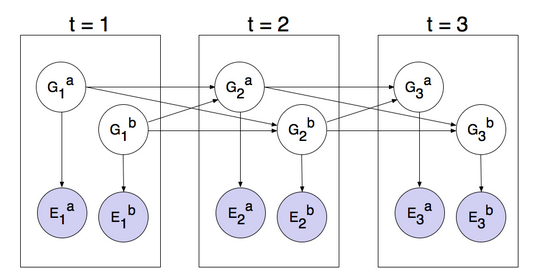

You will now implement a particle filter that tracks multiple ghosts simultaneously. Each particle will represent a tuple of ghost positions that is a sample of where all the ghosts are at the present time. The code is already set up to extract marginal distributions about each ghost from the joint inference algorithm you will create, so that belief clouds about individual ghosts can be displayed.

Complete the `initializeUniformly` method in `JointParticleFilter` in `inference.py`. Your initialization should be consistent with a uniform prior. You may find the Python `itertools` package helpful. Specifically, look at `itertools.product` to get an implementation of the Cartesian product. However, note that, if you use this, the permutations are not returned in a random order. Therefore, you must then shuffle the list of permutations in order to ensure even placement of particles across the board.

As before, use `self.legalPositions` to obtain a list of positions a ghost may occupy. Also as before, the variable you store your particles in must be a list.

To run the autograder for this question and visualize the output:


If you want to run this test (or any of the other tests) without graphics you can add the following flag:


**IMPORTANT**: In general, it is possible sometimes for the autograder to time out if running the tests with graphics. To accurately determine whether or not your code is efficient enough, you should run the tests with the `--no-graphics` flag. If the autograder passes with this flag, then you will receive full points, even if the autograder times out with graphics.


# <font color=blue>*Joint Particle Filter Observation*

In this question, you will complete the `observeUpdate` method in the `JointParticleFilter` class of `inference.py`. A correct implementation will weight and resample the entire list of particles based on the observation of all ghost distances.

To loop over all the ghosts, use:
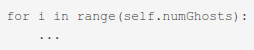

You can still obtain Pacman's position using `gameState.getPacmanPosition()`, but to get the jail position for a ghost, use `self.getJailPosition(i)`, since now there are multiple ghosts each with their own jail positions.

Your implementation should also again handle the special case when all particles receive zero weight. In this case, `self.particles` should be recreated from the prior distribution by calling `initializeUniformly`.

As in the update method for the `ParticleFilter` class, you should again use the function `self.getObservationProb` to find the probability of an observation given Pacman's position, a potential ghost position, and the jail position. The sample method of the `DiscreteDistribution` class will also be useful.

To run the autograder for this question and visualize the output:


If you want to run this test (or any of the other tests) without graphics you can add the following flag:


**IMPORTANT**: In general, it is possible sometimes for the autograder to time out if running the tests with graphics. To accurately determine whether or not your code is efficient enough, you should run the tests with the `--no-graphics` flag. If the autograder passes with this flag, then you will receive full points, even if the autograder times out with graphics.


# <font color=blue>*Joint Particle Filter Time Elapse and Full Test*

Complete the `elapseTime` method in `JointParticleFilter` in `inference.py` to resample each particle correctly for the Bayes net. In particular, each ghost should draw a new position conditioned on the positions of all the ghosts at the previous time step.

As in the last question, you can loop over the ghosts using:
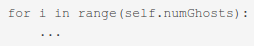

Then, assuming that `i` refers to the index of the ghost, to obtain the distributions over new positions for that single ghost, given the list (`prevGhostPositions`) of previous positions of all of the ghosts, use:


Note that completing this question involves grading both question 9 and question 10. Since these questions involve joint distributions, they require more computational power (and time) to grade, so please be patient!

As you run the autograder note that `q10/1-JointParticlePredict` and `q10/2-JointParticlePredict` test your predict implementations only, and `q10/3-JointParticleFull` tests both your predict and update implementations. Notice the difference between test 1 and test 3. In both tests, pacman knows that the ghosts will move to the sides of the gameboard. What is different between the tests, and why?
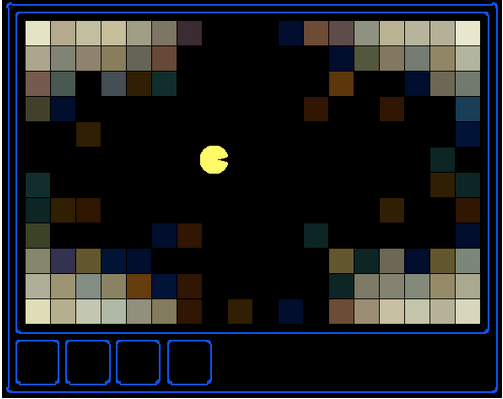

To run the autograder for this question and visualize the output:


If you want to run this test (or any of the other tests) without graphics you can add the following flag:


**IMPORTANT**: In general, it is possible sometimes for the autograder to time out if running the tests with graphics. To accurately determine whether or not your code is efficient enough, you should run the tests with the `--no-graphics` flag. If the autograder passes with this flag, then you will receive full points, even if the autograder times out with graphics.